In [1]:
import pandas as pd
from glob import glob
import numpy as np

In [20]:
all_my_data = sorted(glob('*Physics*.csv',recursive=True))
all_my_data

['Khan_Academy_Physics.csv', 'Physics_Girl.csv']

In [21]:
LIWC_data = pd.concat((pd.read_csv(file).assign(channel_name=file)
          for file in all_my_data))

In [22]:
LIWC_data[["Filename", "Analytic", "Clout", "Authentic", "Tone", "channel_name"]]


,Filename,Analytic,Clout,Authentic,Tone,channel_name
0,20160729.Wave interference _ Mechanical waves ...,48.87,67.93,58.72,66.09,Khan_Academy_Physics.csv
1,20160729.Mass swinging in a horizontal circle ...,54.19,65.63,48.65,9.56,Khan_Academy_Physics.csv
2,20160729.Electric power _ Circuits _ Physics _...,45.72,61.00,44.47,88.52,Khan_Academy_Physics.csv
3,20160729.How to use the shortcut for solving e...,53.14,57.63,49.21,39.17,Khan_Academy_Physics.csv
4,20160801.Finding torque for angled forces _ Ph...,49.64,64.66,26.34,25.77,Khan_Academy_Physics.csv
...,...,...,...,...,...,...
154,20190823.Why are there giant concrete tunnels ...,61.84,72.18,67.27,45.26,Physics_Girl.csv
155,20160112.5 AMAZING stars we’ve discovered in s...,82.87,63.53,35.59,55.74,Physics_Girl.csv
156,20151020.AMAZING! Ferrofluid + Glow Sticks.RtB...,86.25,53.06,34.01,63.52,Physics_Girl.csv
157,20121019.What can you do with a physics degree...,53.18,64.93,50.45,80.36,Physics_Girl.csv


<AxesSubplot:title={'center':'Analytic Scores'}, xlabel='Analytic', ylabel='Count'>

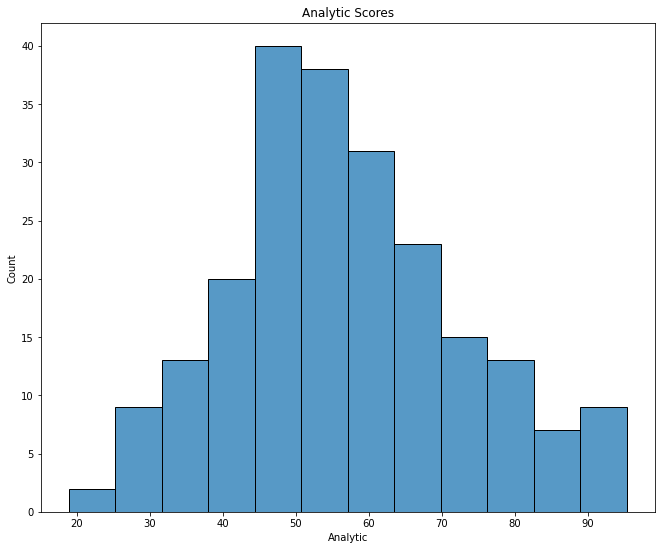

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(11,9))
plt.title('Analytic Scores')
#plt.ylabel('pdf')
sns.histplot(LIWC_data.Analytic)

<AxesSubplot:title={'center':'Clout'}, xlabel='Clout', ylabel='Count'>

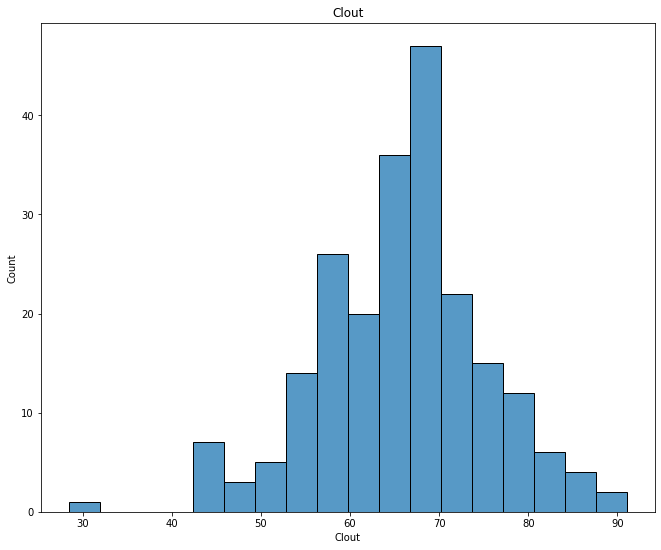

In [24]:
f, ax = plt.subplots(figsize=(11,9))
plt.title('Clout')
#plt.ylabel('pdf')
sns.histplot(LIWC_data.Clout)

<AxesSubplot:title={'center':'Authentic'}, xlabel='Authentic', ylabel='Count'>

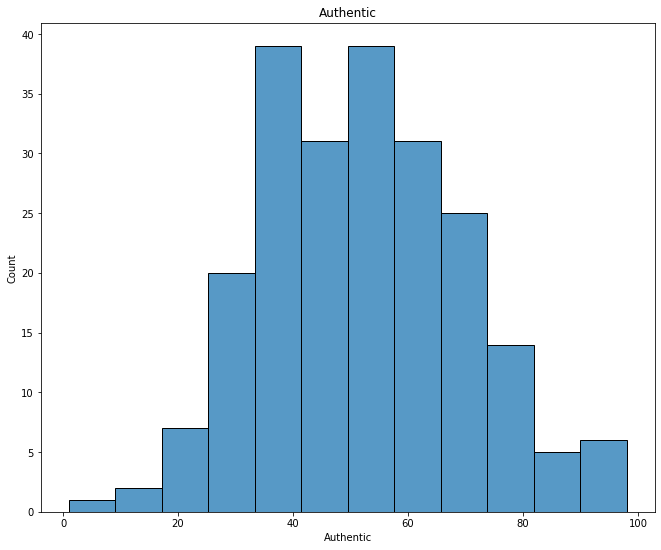

In [25]:
f, ax = plt.subplots(figsize=(11,9))
plt.title('Authentic')
#plt.ylabel('pdf')
sns.histplot(LIWC_data.Authentic)

<AxesSubplot:title={'center':'Tone'}, xlabel='Tone', ylabel='Count'>

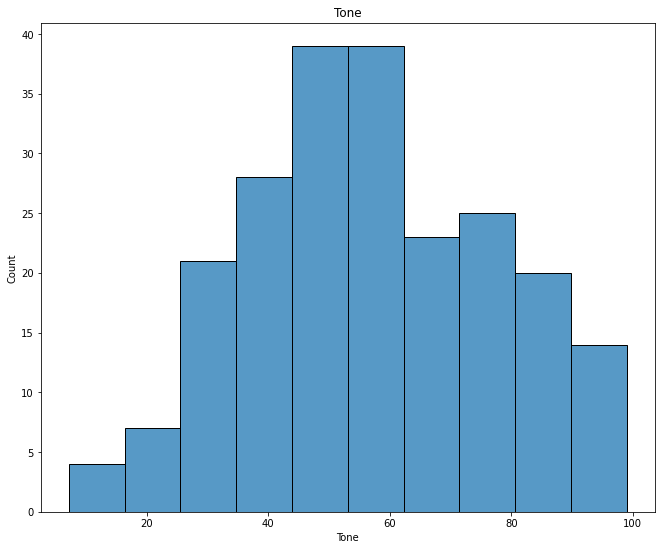

In [26]:
f, ax = plt.subplots(figsize=(11,9))
plt.title('Tone')
#plt.ylabel('pdf')
sns.histplot(LIWC_data.Tone)

In [27]:
LIWC_data[["Analytic", "Clout", "Authentic", "Tone"]].mean()

Analytic     56.705818
Clout        65.816818
Authentic    52.265045
Tone         56.733818
dtype: float64

In [28]:
LIWC_data[["Analytic", "Clout", "Authentic", "Tone"]].std()

Analytic     15.586329
Clout         9.484701
Authentic    17.491768
Tone         20.346213
dtype: float64

In [29]:
LIWC_data[["Analytic", "Clout", "Authentic", "Tone","channel_name"]].groupby("channel_name").aggregate([np.mean, np.std])

Analytic                 Clout            \
                               mean        std       mean       std   
channel_name                                                          
Khan_Academy_Physics.csv  53.930164  15.712797  63.831803  8.260399   
Physics_Girl.csv          57.770692  15.454853  66.578365  9.832303   

                          Authentic                  Tone             
                               mean        std       mean        std  
channel_name                                                          
Khan_Academy_Physics.csv  50.976230  17.255993  51.375082  22.500576  
Physics_Girl.csv          52.759497  17.610288  58.789686  19.136222

<AxesSubplot:title={'center':'Analytic'}, xlabel='channel_name'>

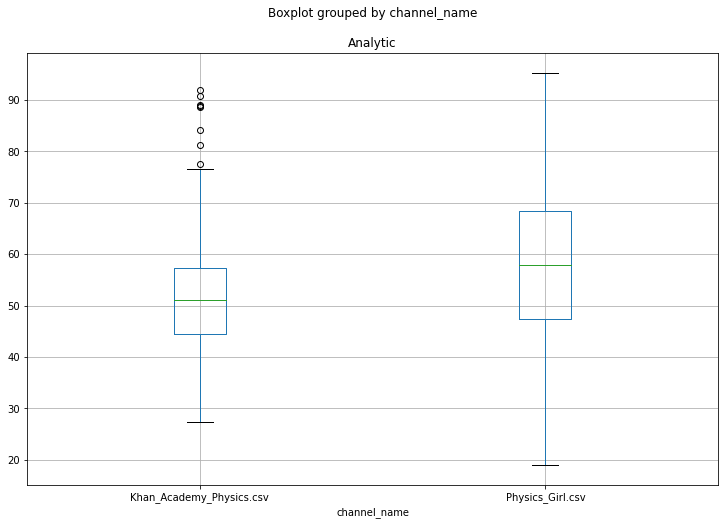

In [30]:
LIWC_data.boxplot('Analytic', by='channel_name', figsize=(12, 8))

In [31]:
# https://pingouin-stats.org
import pingouin as pg

In [32]:
aov = pg.anova(data=LIWC_data, dv='Analytic', between='channel_name', detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,channel_name,650.258630,1,650.258630,2.697439,0.101951,0.012222
1,Within,52552.211722,218,241.065191,NaN,NaN,NaN


In [33]:
aov = pg.anova(data=LIWC_data, dv='Clout', between='channel_name', detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,channel_name,332.569896,1,332.569896,3.743189,0.054317,0.016881
1,Within,19368.572676,218,88.846664,NaN,NaN,NaN


In [34]:
aov = pg.anova(data=LIWC_data, dv='Authentic', between='channel_name', detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,channel_name,140.196507,1,140.196507,0.45708,0.499709,0.002092
1,Within,66865.471793,218,306.722348,NaN,NaN,NaN


In [35]:
aov = pg.anova(data=LIWC_data, dv='Tone', between='channel_name', detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,channel_name,2423.707184,1,2423.707184,5.988168,0.015193,0.026734
1,Within,88235.365009,218,404.749381,NaN,NaN,NaN


In [ ]:
cat1 = LIWC_data[LIWC_data['']=='cat1']
cat2 = my_data[my_data['Category']=='cat2']

ttest_ind(cat1['values'], cat2['values'])